In [1]:
from matplotlib.figure import Figure
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Functions that represent effort, based on the beta probability distribution
a, b = 5, 1.3  # parameters for the beta distribution
x = np.linspace(0,1, 100)
latex = beta.pdf(x, a=1.5, b=4.5)    # effort to learn latex
content = beta.pdf(x, a=4.5, b=1.5)  # effort to write content

# Load an image to use as a decoration
def put_image(file_name: str, y: float) -> AnnotationBbox:
    return AnnotationBbox(
        OffsetImage(plt.imread(file_name), zoom=.1),
        (-.05, y),
        frameon=False)

def add_decorations(ax: plt.Axes):
    ax.set_frame_on(False)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 5.2)
    ax.set_xticks([],[])
    ax.set_yticks([],[])
    ax.yaxis.set_label_text('Effort')
    ax.xaxis.set_label_text('Time')
    
    ax.add_artist(put_image('beach_with_umbrella.png', y=.1));
    ax.add_artist(put_image('sunglasses.png', y=1.33));
    ax.add_artist(put_image('sweat_smile.png', y=2.66));
    ax.add_artist(put_image('scream.png', y=4));
    ax.hlines([1.33, 2.66, 4], 0, 1, color='grey', alpha=0.5, linestyle='dotted')
    ax.axvline(1, color='red')
    ax.text(1, 2, 'deadline', color='red', fontsize=12, rotation=270)

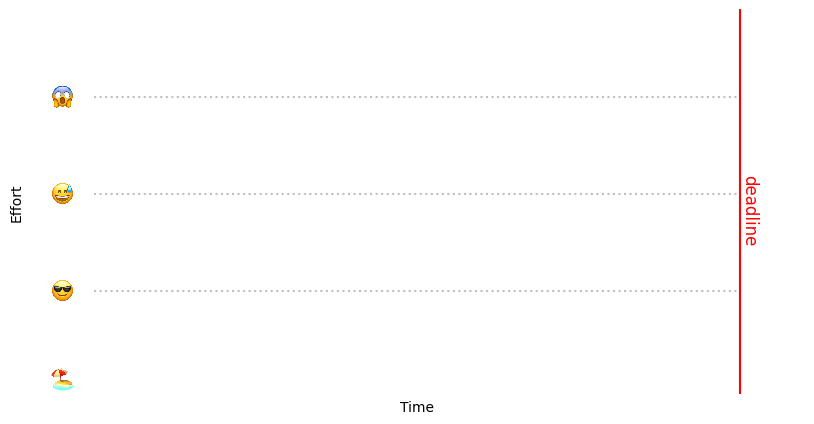

In [2]:
# Empty plot
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,5))
add_decorations(ax)
plt.savefig('../2/time_effort_empty.png')

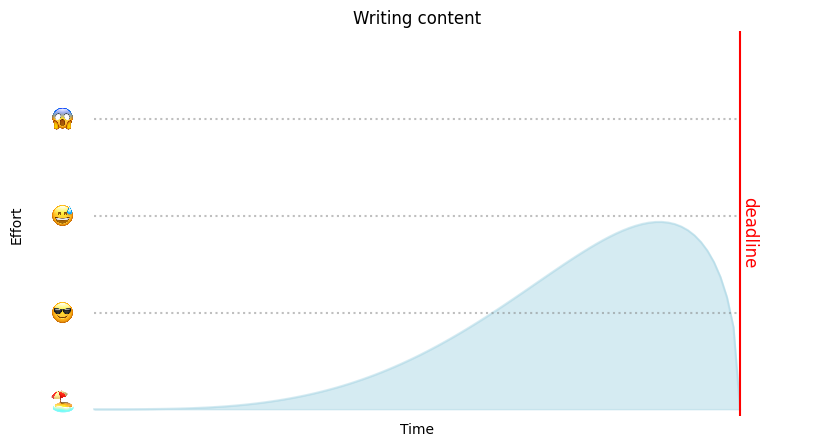

In [3]:
# Effort of writing the content of a paper
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,5))
ax.set_title('Writing content')
ax.plot(x, content, alpha=0.5, color='lightblue');
ax.fill_between(x, y1=0, y2=content, alpha=0.5, color='lightblue');
add_decorations(ax)
plt.savefig('../2/time_effort_content.png')

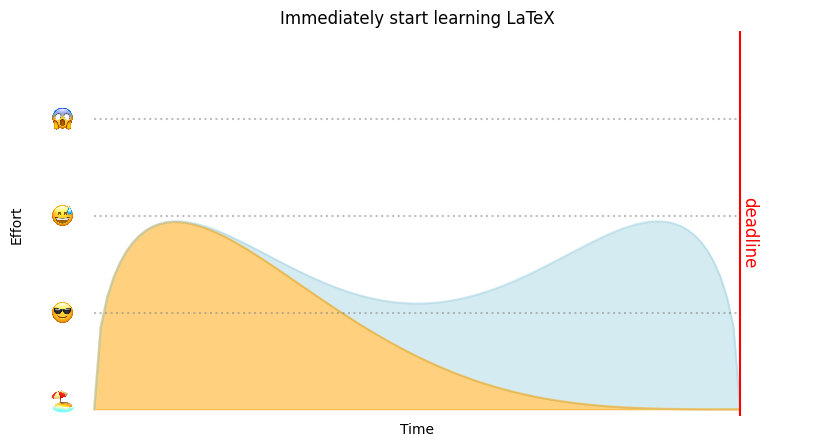

In [4]:
# Effort when you immediately start learning LaTeX
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,5))
ax.set_title('Immediately start learning LaTeX')
ax.plot(x, latex, alpha=0.5, color='orange');
ax.plot(x, content+latex, alpha=0.5, color='lightblue');
ax.fill_between(x, y1=0, y2=latex, alpha=0.5, color='orange');
ax.fill_between(x, y1=latex, y2=content+latex, alpha=0.5, color='lightblue');
add_decorations(ax)
plt.savefig('../2/time_effort_latex_first.png')

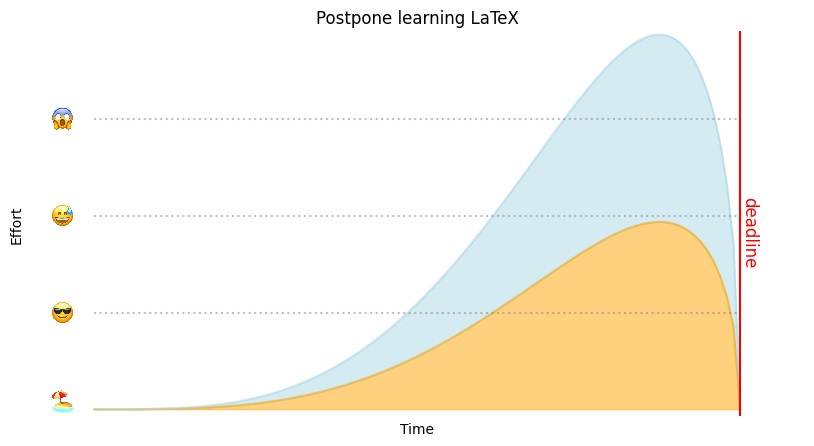

In [5]:
# Effort when you postpone learning LaTeX
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,5))
ax.set_title('Postpone learning LaTeX')
ax.plot(x, content, alpha=0.5, color='orange');
ax.plot(x, 2*content, alpha=0.5, color='lightblue');
ax.fill_between(x, y1=0, y2=content, alpha=0.5, color='orange');
ax.fill_between(x, y1=content, y2=2*content, alpha=0.5, color='lightblue');
add_decorations(ax)
plt.savefig('../2/time_effort_postpone_latex.png')
